### Name : Durga Devi B

### Data Science and Business Analytics Internship at the Sparks Foundation

TASK-1 : Predict the percentage of a student based on the no. of study hours. 
         Predict using Supervised Machine Learning.

In [1]:
import os
os.chdir(r"C:\Users\ACER\Desktop\practice\Internship")
os.getcwd()

'C:\\Users\\ACER\\Desktop\\practice\\Internship'

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
# Collecting the Data :

data=pd.read_csv(r'student_scores - student_scores.csv')
data.head(10)

#This dataset contains two columns (Hours,Scores)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Exploration

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
#Basic Statistics of the data

data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.shape

(25, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Detecting Outliers and Handling them

In [21]:
#Detecting outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1                         
print(IQR)

Hours      4.7
Scores    45.0
dtype: float64


In [20]:
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)

Hours     -4.35
Scores   -37.50
dtype: float64
Hours      14.45
Scores    142.50
dtype: float64


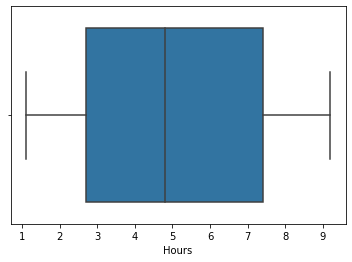

In [31]:
sns.boxplot(data['Hours'])   

#It does not have as such any outliers, so we are good to go.

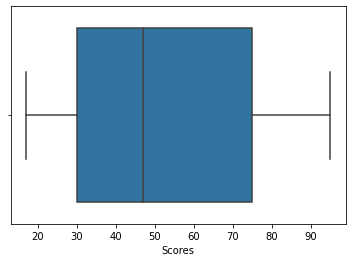

In [32]:
sns.boxplot(data['Scores'])   

#It does not have as such any outliers, so we are good to go.


## Exploratory Data Analysis:

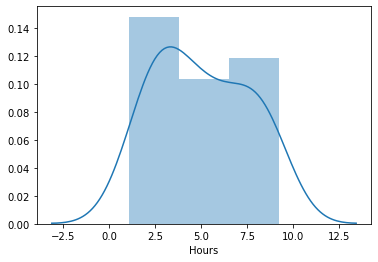

In [34]:
sns.distplot(data['Hours'])


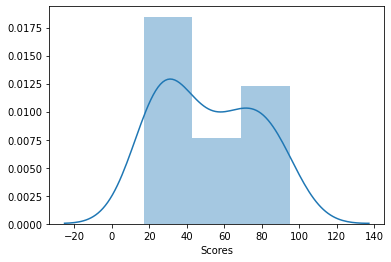

In [35]:
sns.distplot(data['Scores'])


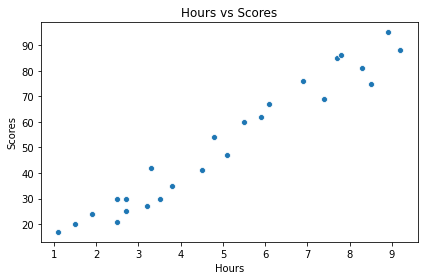

In [68]:
sns.scatterplot(data['Hours'],data['Scores'])
plt.title("Hours vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.tight_layout()
plt.show()

### Both hours and scores are linearly dependent on each other. Hence, we can move forward for Linear regression

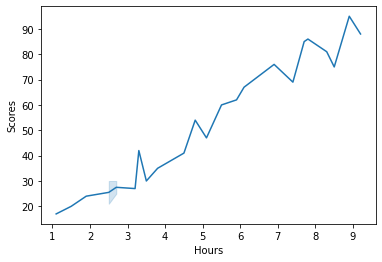

In [40]:
sns.lineplot(data['Hours'],data['Scores'])  


## Model Building:

In [44]:
## data Slicing
X = data.iloc[:,0].values  
y = data.iloc[:,-1].values


In [88]:
#Reshape data
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [89]:
#Splitting data into 80% Training data and 20% Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [90]:
#Importing Linear Regressor in the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fitting data into Linear Regressor
model = lr.fit(X_train,y_train)

#Prediction of the model
predicted = model.predict(X_test)


## Model Evaluation

Now using linear regression equation, y = mx + c.
we will evaluate how accurate is our prediction.

In [91]:
#Linear regression line slope
m = model.coef_
print(m)
#Linear regression line y-intercept
c = model.intercept_
print(c)

[[9.91065648]]
[2.01816004]


In [92]:
predicted_line = (m*X) + c

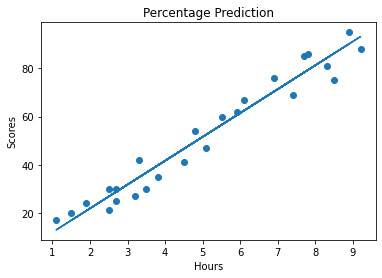

In [93]:
#plotting predicted line
plt.title("Percentage Prediction")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(X, y)
plt.plot(X,predicted_line);
plt.show()

## Checking error of prediction and R2 Score

In [94]:
from sklearn.metrics import mean_absolute_error
print("MAE of predictions is ",mean_absolute_error(y_test,predicted))
print("Accuracy R2 Score of model is",model.score(X_test,y_test))

MAE of predictions is  4.183859899002975
Accuracy R2 Score of model is 0.9454906892105356
